In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [104]:
bike2017=pd.read_csv('clean_bikes.csv')

In [6]:
bike2017.head()

Unnamed: 0  duration_min  start_station_id  \
0           0   1335.166667                74   
1           1   1313.333333               284   
2           2    762.800000               245   
3           3   1036.200000                60   
4           4    726.716667               239   

                                  start_station_name  start_station_latitude  \
0                              Laguna St at Hayes St               37.776435   
1  Yerba Buena Center for the Arts (Howard St at ...               37.784872   
2                             Downtown Berkeley BART               37.870348   
3                               8th St at Ringold St               37.774520   
4                      Bancroft Way at Telegraph Ave               37.868813   

   start_station_longitude  end_station_id  \
0              -122.426244              43   
1              -122.400876              96   
2              -122.267764             245   
3              -122.409449               5   
4              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type member_gender  Customer_age  \
0            -122.415929       96    Customer          Male     32.000000   
1            -122.426614       88    Customer        Female     54.000000   
2            -122.267764     1094    Customer           NaN     38.595213   
3            -122.408445     2831    Customer           NaN     38.595213   
4            -122.265896     3167  Subscriber        Female     22.000000   

  general_runtime Customer_decade  hour_start day_start  month_start  
0            long             30s          16    Sunday           12  
1            long             50s          15    Sunday           12  
2            long             NaN          22    Sunday           12  
3            long             NaN          17    Sunday           12  
4            long             20s          14    Sunday           12

# Ford GoBike 2017

In this data set we can find a report of all the bike rides at the city of San Francisco

## The structure of the dataset
There are 519700 bike rides in the dataset with 19 features . Most variables are categorical.

## The main features of interest in my dataset.

I'm most interested in figuring out how does every different biker group (gender, age, custormer-subscriber) behave and how the bike use change through time.

Some questions i would like to answer are:

1) How does our clients seperate by gender and age?

2) What are the riding habits of each gender? Are there any differentiations or all the genders have the same behavior in a day?

3) Which month, day, hour has the more rentals?

4) What are the riding habbits of subrcibers and ordinary customers?

5) Why does our cliends rent our bikes? Is it for fun or for every day activities? Is it the same both for "subscribers" and "customers"?

6) Which are the most popular starting end destination stations?



The following analysis will answer all the above questions

1.Lets start with a look at riders diversity through age and gender

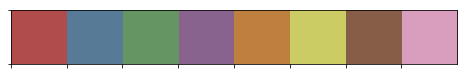

In [7]:
# let's plot all some categorical variables together to get an idea of each  variable's distribution.

fig, ax = plt.subplots(ncols=2, figsize = [15,6])

default_color =sb.palplot(sb.color_palette("Set1", n_colors=8, desat=.5));
sb.countplot(data = bike2017, x = 'Customer_decade', color = default_color, ax = ax[0])
ax[0].set_title('Riders per age decade')
ax[0].set_ylabel('Riders')
ax[0].set_xlabel('Age decade')



sb.countplot(data = bike2017, x = 'member_gender', color = default_color, ax = ax[1])
ax[1].set_title('Riders per gender')
ax[1].set_ylabel('Riders')
ax[1].set_xlabel('gender')




plt.show();

The bikers are generaly young with the majority in their 20s-30s. Additionaly the majority are men.

We can see that only for the women the 40s decade is lower than 20s. It means that the women over 40 years old do not prefer bikes. 

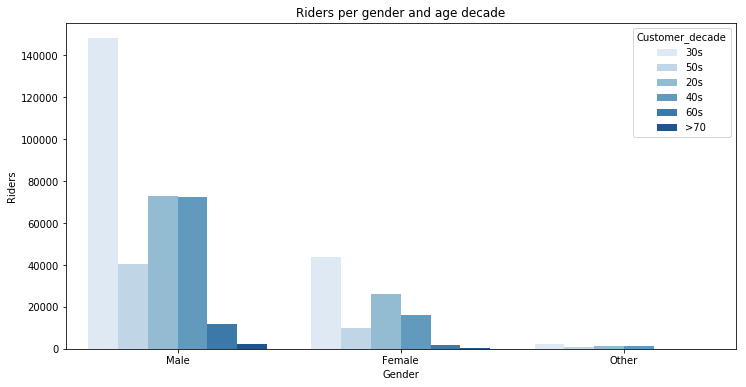

In [86]:
plt.figure(figsize=(12, 6))
b=sb.countplot(data = bike2017,x = 'member_gender',hue = 'Customer_decade',palette = 'Blues')
b.set_title('Riders per gender and age decade')
b.set_ylabel('Riders')
b.set_xlabel('Gender');


Bellow we can see that the biggest group is "Male riders at their 30s" and the smallest is "Other riders older than 70 years old"

In [121]:
ccounts=bike2017.groupby(['member_gender','Customer_decade']).size()
ccounts = ccounts.reset_index(name = 'count')
ccounts = ccounts.pivot(index = 'Customer_decade', columns = 'member_gender', values = 'count')

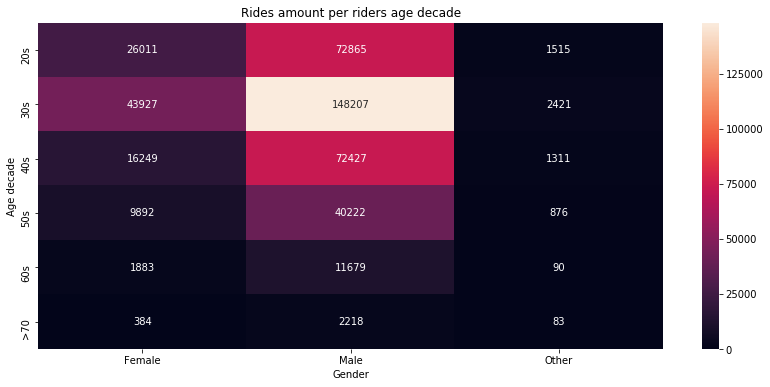

In [122]:
plt.figure(figsize=(14, 6))
b=sb.heatmap(ccounts,annot = True, fmt = 'd',square=False)
b.set_title('Rides amount per riders age decade')
b.set_ylabel('Age decade')
b.set_xlabel('Gender')

plt.show();

2.What are the riding habits of each gender? Are there any differentiations or all the genders have the same behavior in a day?



The hour diagram does not show something different for the genders. They all follow the same movement through the day.We can see that the bike usage starts at 06:00 and ends around 22:00-23:00. 

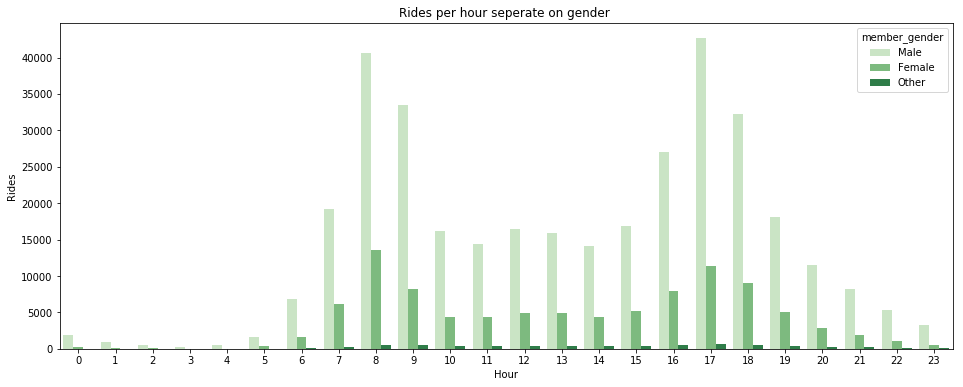

In [85]:
plt.figure(figsize=(16, 6))
a=sb.countplot(data = bike2017, x = 'hour_start', hue = 'member_gender', palette = 'Greens')
#ax.legend(ncol = 2) # re-arrange legend to reduce overlapping


a.set_title('Rides per hour seperate on gender ')
a.set_ylabel('Rides')
a.set_xlabel('Hour')

plt.show()

What is intresting, is that the Females have the biggest duration mean on their rides. At the other hand, men taking the shortest rides. 

In [119]:
plt.figure(figsize=(12, 6))
a=bike2017[bike2017['duration_min']<60]
base_color = sb.color_palette()[3]
b=sb.boxplot(data = a, x='duration_min', y='member_gender', color = base_color);
b.set_title('Duration of "Under 1 hour" rides')
b.set_ylabel('Gender')
b.set_xlabel('Duration (min)')

plt.show()

Lets see the same diagram only for the younger riders.

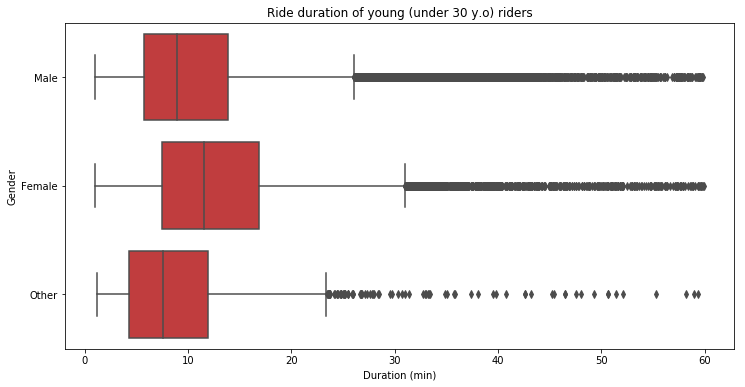

In [120]:
plt.figure(figsize=(12, 6))
y=a[a['Customer_age']<30]
base_color = sb.color_palette()[3]
b=sb.boxplot(data = y, x='duration_min', y='member_gender', color = base_color);
b.set_title('Ride duration of young (under 30 y.o) riders')
b.set_ylabel('Gender')
b.set_xlabel('Duration (min)')
plt.show();

Here, the differences between the genders are bigger. At the 'under 30s age' the Other gender take the shortest rides

We can see the same thing below:

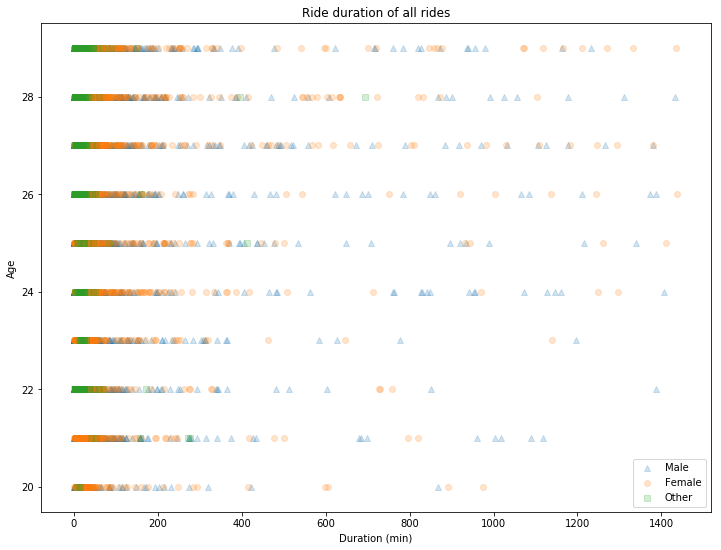

In [11]:
young=bike2017[bike2017['Customer_age']<30]

gender = [['Male', '^'],['Female','o'],
               ['Other', 's']]
plt.figure(figsize = [12, 9])
for gen, marker in gender:
    df_gender = young[young['member_gender'] == gen]
    plt.scatter(data = df_gender, x = 'duration_min', y = 'Customer_age',
                marker = marker,alpha = 1/5)

plt.legend(['Male','Female','Other']);
plt.title('Ride duration of all rides')
plt.ylabel('Age')

plt.xlabel('Duration (min)')
plt.show();

3.Now lets take a look on how the rides are separated per month, day and hour and which month, day, hour has  more rentals.

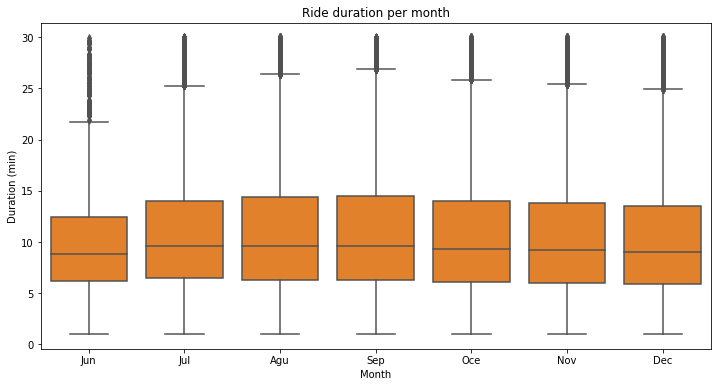

<Figure size 864x864 with 0 Axes>

In [124]:

month=("Jun","Jul", "Agu","Sep", 
           "Oce", "Nov", "Dec")
a=bike2017[bike2017['duration_min']<30]
base_color = sb.color_palette()[1]
plt.figure(figsize=(12, 6))
b=sb.boxplot(data = a, x='month_start', y='duration_min', color = base_color);
plt.figure(figsize = [12, 12])
b.set_title('Ride duration per month')
b.set_ylabel('Duration (min)')
b.set_xlabel('Month')
b.set_xticklabels(month)
plt.show();

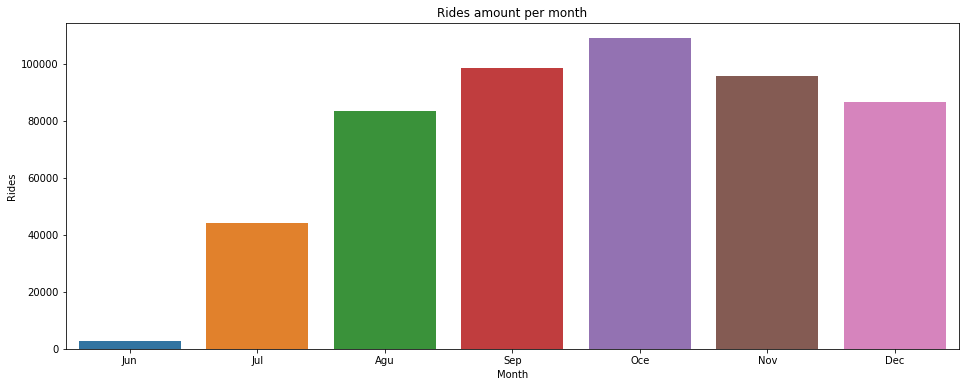

In [96]:
plt.figure(figsize=(16, 6))
b=sb.countplot(data = bike2017, x = 'month_start');
b.set_title('Rides amount per month')
b.set_ylabel('Rides')
b.set_xlabel('Month')
b.set_xticklabels(month)
plt.show();

We can see that the month with the more rides is Ocrober.

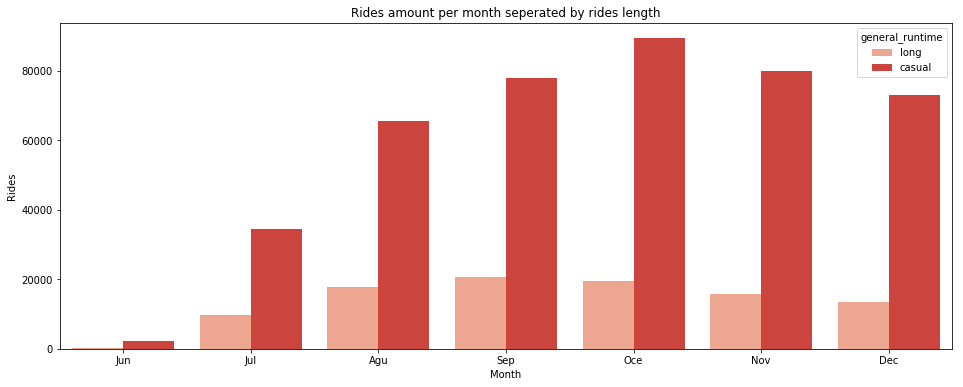

In [97]:
plt.figure(figsize=(16, 6))
b=sb.countplot(data = bike2017, x = 'month_start',hue='general_runtime',palette = 'Reds');
b.set_title('Rides amount per month seperated by rides length')
b.set_ylabel('Rides')
b.set_xlabel('Month')
b.set_xticklabels(month)
plt.show();

Now lets see the movement per day. I want to take a look how the daily usage is separated on the kind of the client (Subscriber or Customer) and gender.

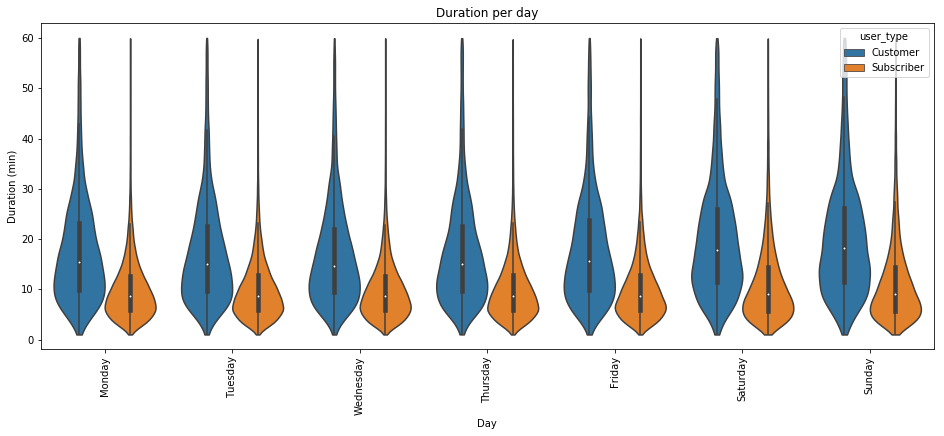

In [125]:
plt.figure(figsize=(16, 6))
a=bike2017[bike2017['duration_min']<=60]
g=sb.violinplot(x=a['day_start'],y=a['duration_min'],hue='user_type',data=a, order=["Monday", "Tuesday","Wednesday","Thursday",
                                                                                    "Friday","Saturday","Sunday"],scale="width",cut=0)
g.set_title('Duration per day')
g.set_ylabel('Duration (min)')
g.set_xlabel('Day')
plt.xticks(rotation=90);

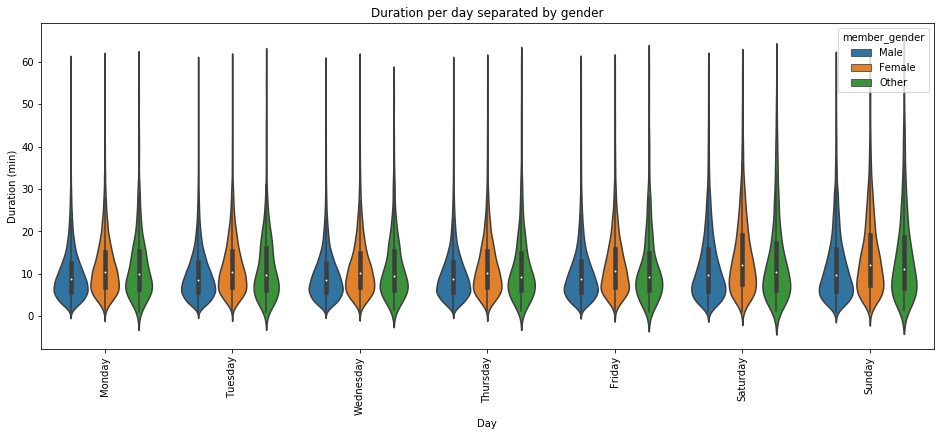

In [59]:
plt.figure(figsize=(16, 6))
a=bike2017[bike2017['duration_min']<=60]
g=sb.violinplot(x=a['day_start'],y=a['duration_min'],hue='member_gender',order=["Monday", "Tuesday","Wednesday","Thursday",
                                                                                  "Friday","Saturday","Sunday"],data=a)
plt.xticks(rotation=90)
g.set_title('Duration per day separated by gender')
g.set_ylabel('Duration (min)')
g.set_xlabel('Day');

We can see that 'Customers' are taking longer rides every day. Generally at weekends the rides are longer for all genders. 

4.What are the riding habbits of subrcibers and ordinary customers?

It is obvious  that at weekends the rides are generally  longer especially  for the Customers. The subscribers seem to keep the same duration mean for every day in a week. I can assume that this is happening because subscribers are using the bikes for a specific reason and no for leisure. That is why we do not see longer rides at the weekend by them. At the other hand, the Customers are using the bikes mainly at weekends.

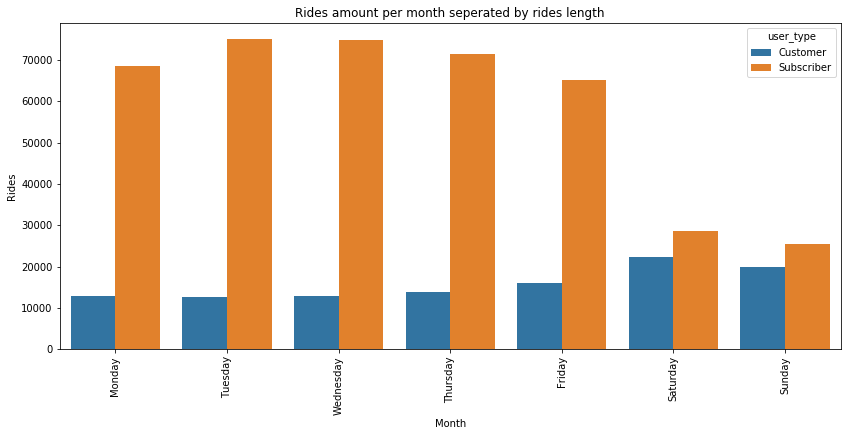

In [60]:
plt.figure(figsize=(14, 6))
b=sb.countplot(data = bike2017, x = 'day_start',hue='user_type',order=["Monday", "Tuesday","Wednesday","Thursday",
                                                                                  "Friday","Saturday","Sunday"]);
b.set_title('Rides amount per month seperated by rides length')
b.set_ylabel('Rides')
b.set_xlabel('Day')
plt.xticks(rotation=90)
plt.show();

Now lets take a look riders behavior based on month and day. 

In [64]:
dcounts=bike2017.groupby(['month_start','day_start']).size()
dcounts = dcounts.reset_index(name = 'count')
dcounts = dcounts.pivot(index = 'day_start', columns = 'month_start', values = 'count')

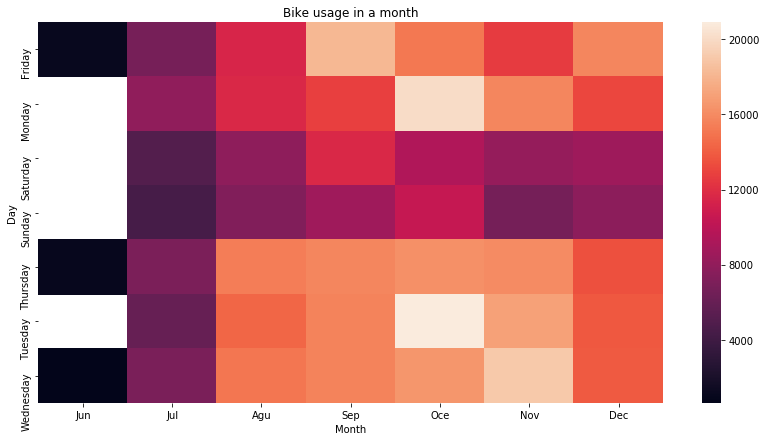

In [123]:
plt.figure(figsize=(14, 7))
b=sb.heatmap(dcounts, square=False)
b.set_title('Bike usage in a month')
b.set_ylabel('Day')
b.set_xlabel('Month');
b.set_xticklabels(month);

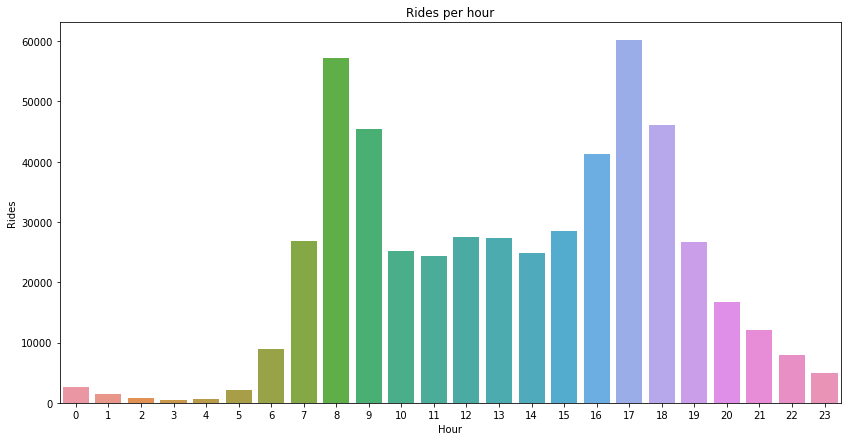

In [83]:
plt.figure(figsize=(14, 7))
mcount=bike2017.groupby('hour_start').size()
mcount = mcount.reset_index(name = 'count')
g=sb.barplot(data = mcount, x = 'hour_start',y='count');
g.set_title('Rides per hour')
g.set_ylabel('Rides')
g.set_xlabel('Hour');

The most crowded days where the Thuesdays and Mondays of October.

5.Why does our cliends rent the bikes? Is it for fun or for every day activities? Is it the same both for "subscribers" and "customers"?

We can see that the more rides are on working days at 8:00 and 16:00-17:00. This can lead us to the conclusion that the riders are using their bikes to go to work at working days. At weekends the most popular hours are 11:00-15:00 and as we saw previously more riders are 'Customers' that means that at weekend the bikes are used maily for fun rides around the city.

In [23]:
hcounts=bike2017.groupby(['day_start','hour_start']).size()
hcounts = hcounts.reset_index(name = 'count')
hcounts = hcounts.pivot(index = 'hour_start', columns = 'day_start', values = 'count')

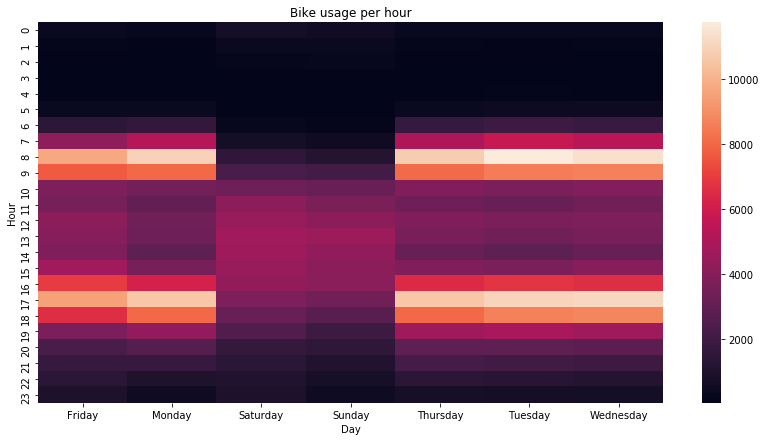

In [84]:
plt.figure(figsize=(14, 7))
b=sb.heatmap(hcounts,square=False)
b.set_title('Bike usage per hour')
b.set_ylabel('Hour')
b.set_xlabel('Day');

6.Which are the most popular starting end destination stations?

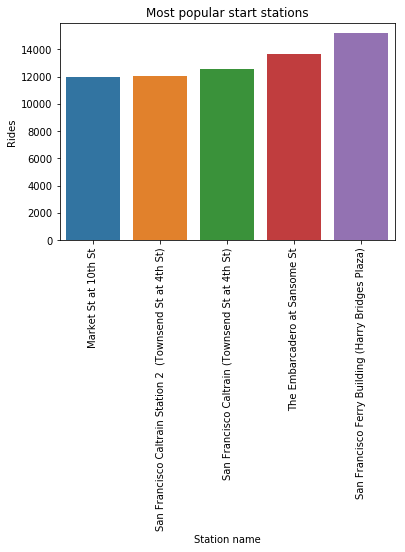

In [25]:
mcount=bike2017.groupby('start_station_name').size().sort_values().tail()
mcount = mcount.reset_index(name = 'count')
pl=sb.barplot(data = mcount, x ='start_station_name',y='count');
pl.set_title('Most popular start stations')
pl.set_ylabel('Rides')
pl.set_xlabel('Station name');
plt.xticks(rotation=90);

In [26]:
mcount=bike2017.groupby('end_station_name').size().sort_values().tail()
mcount = mcount.reset_index(name = 'count')
pl=sb.barplot(data = mcount, x ='end_station_name',y='count');
pl.set_title('Most popular destination stations')
pl.set_ylabel('Rides')
pl.set_xlabel('Station name');
plt.xticks(rotation=90);